# Pandas Basic 3

In [1]:
from IPython.display import Image
import pandas as pd

import numpy as np

# 3. Summarizing and compyting descriptive statistics

> 기술 통계 계산과 요약
- 판다스 객체는 이ㄹ반적인 수학 메소드와 통계 메소드를 가지고 있다.
- 대부분 Series나 DF 하나의 컬럼이나 로우에서 단일 값(합이나 평균 같은)을 구하는 축소 혹은 요약통계 범주
- 순수 Numpy 배열에서 제공하는 동일한 메소드와 비교하여 pandas 메소드는 처음부터 누락되 데이터를 제외하도록 설꼐되었다.

In [2]:
df = pd.DataFrame([[1.4,np.nan],
                [7.1, -4.5],
                [np.nan, np.nan],
                [0.75, -1.3]], index = ['a','b','c','d'], columns = ['one','two'])
df



,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [3]:
df.sum()  # num 값을 제외하고 계산

one    9.25
two   -5.80
dtype: float64

In [4]:
#skinpa: 누락된 값을 제외할 것을 정하는 옵션
df.mean(axis = 1, skipna= False)   

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [5]:
df.mean(axis = 1, skipna = True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

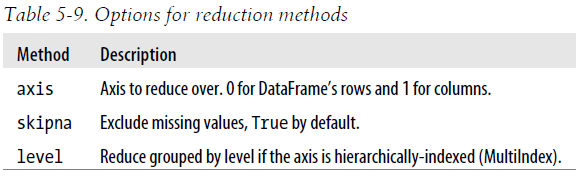

In [6]:
# 축소 메소드 옵션
Image('./images/table5_9.png')

# Image('./images/table5_4.png')

In [7]:
df


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [9]:
# 컬럼별로 제일 큰 값이 있는 인덱스값 반환
df.idxmax()

one    b
two    d
dtype: object

In [11]:
# 누적 합계량
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [13]:
# 한번에 통계 결과를 여러개 만들어내는 함수

df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [18]:
?df.describe

In [24]:
# 범주형 변수의 diesribe
obj = pd.Series(['a','a','b','c']*4)

obj.describe()

IndentationError: unexpected indent (<ipython-input-24-0f05321b974f>, line 4)

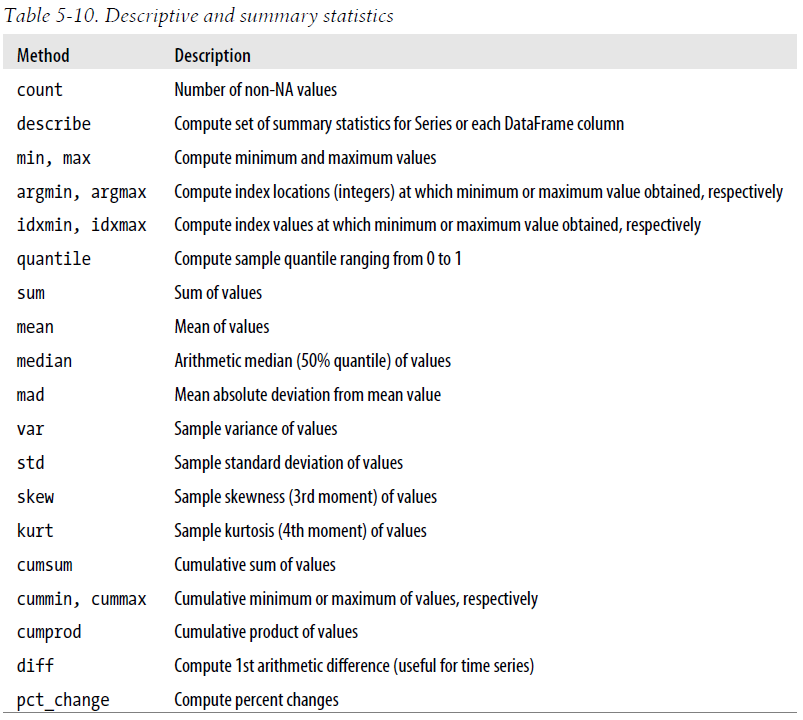

In [26]:
# 기술통계와 통계 요약
Image('./images/table5_10.png')

## 3.1 Unique values, value counts, and membership

> 유일값, 값 세기 , 멤버십

In [28]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])



In [29]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [30]:
# 값의 개수가 몇개인지 확인.
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [32]:
pd.value_counts(obj.values, sort = False)  # 값의 개수 기준으로 sort

c    3
a    3
b    2
d    1
dtype: int64

In [33]:
pd.value_counts(obj.values, sort = True)  # 값의 개수 기준으로 sort

a    3
c    3
b    2
d    1
dtype: int64

In [34]:
# 값이 DF에 있는지 확인
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [35]:
#조건에 해당하는 것만 보여주기
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [36]:
data = pd.DataFrame ({'Qu1': [1,3,4,3,4],
                     'Qu2': [2,3,4,2,3],
                     'Qu3': [1,5,2,4,4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,4,2
3,3,2,4
4,4,3,4


In [40]:
# 컬럼별로 값이 몇개있는지 확인(index: 값으로)
# DataFrame. apply()
result = data.apply(pd.value_counts).fillna(0)  # 없는 값은 0으로 채우기
result

,Qu1,Qu2,Qu3
1,1.0,0.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,1.0,2.0
5,0.0,0.0,1.0


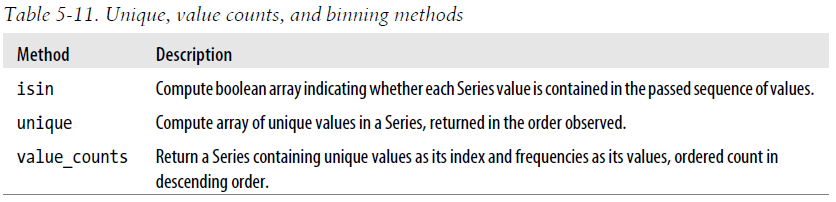

In [41]:
# 유일값, 값세기, 버리기 메소드
Image('./images/table5_11.png')